In [1]:
import cv2
import numpy as np
from pandas import DataFrame, read_csv
from matplotlib import pyplot as plt
from shutil import copy2

In [2]:
!ls



 all_ones_benchmark.csv        class2		   images_training_rev1
 all_zeros_benchmark.csv       class3		   test.png
 central_pixel_benchmark.csv  'Galaxy zoo.ipynb'   training_solutions_rev1.csv
 class1			       images_test_rev1


In [3]:
y_filename='training_solutions_rev1.csv'
y = read_csv(y_filename, index_col=0)[['Class1.1','Class1.2','Class1.3']]
y['Class']= y.idxmax(axis=1)
y_1 = y['Class']

In [4]:
class1 = y.loc[y_1=='Class1.1']
class2 = y.loc[y_1=='Class1.2']
class3 = y.loc[y_1=='Class1.3']

In [5]:
class1 = class1.sort_values(by='Class1.1', ascending=False)
class2 = class2.sort_values(by='Class1.2', ascending=False)
class3 = class3.sort_values(by='Class1.3', ascending=False)

In [6]:
class1_imgs = []
class2_imgs = []
class3_imgs = []

Copy 100 files for each class

In [7]:
dir = './images_training_rev1/'
for index in class1.iloc[0:100].index:
    filename = dir + str(index) + '.jpg'
    dest = './class1/' 
    copy2(filename, dest)
for index in class2.iloc[0:100].index:
    filename = dir + str(index) + '.jpg'
    dest = './class2/'
    copy2(filename, dest)
for index in class3.iloc[0:100].index:
    filename = dir + str(index) + '.jpg'
    dest = './class3/' 
    copy2(filename, dest)

In [8]:
dir = './images_training_rev1/'
for index in class1.iloc[0:16].index:
    filename = dir + str(index) + '.jpg'
    img =  cv2.imread(filename)
    class1_imgs.append(img)
for index in class2.iloc[0:16].index:
    filename = dir + str(index) + '.jpg'
    img =  cv2.imread(filename)
    class2_imgs.append(img)
for index in class3.iloc[0:16].index:
    filename = dir + str(index) + '.jpg'
    img =  cv2.imread(filename)
    class3_imgs.append(img)

In [9]:
def plot16(images):
    plt.figure(figsize=(16,16))

    for i, image in enumerate(images):
        plt.subplot(4,4, i+1)
        plt.axis("off")
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
                  interpolation='nearest')
    plt.show()

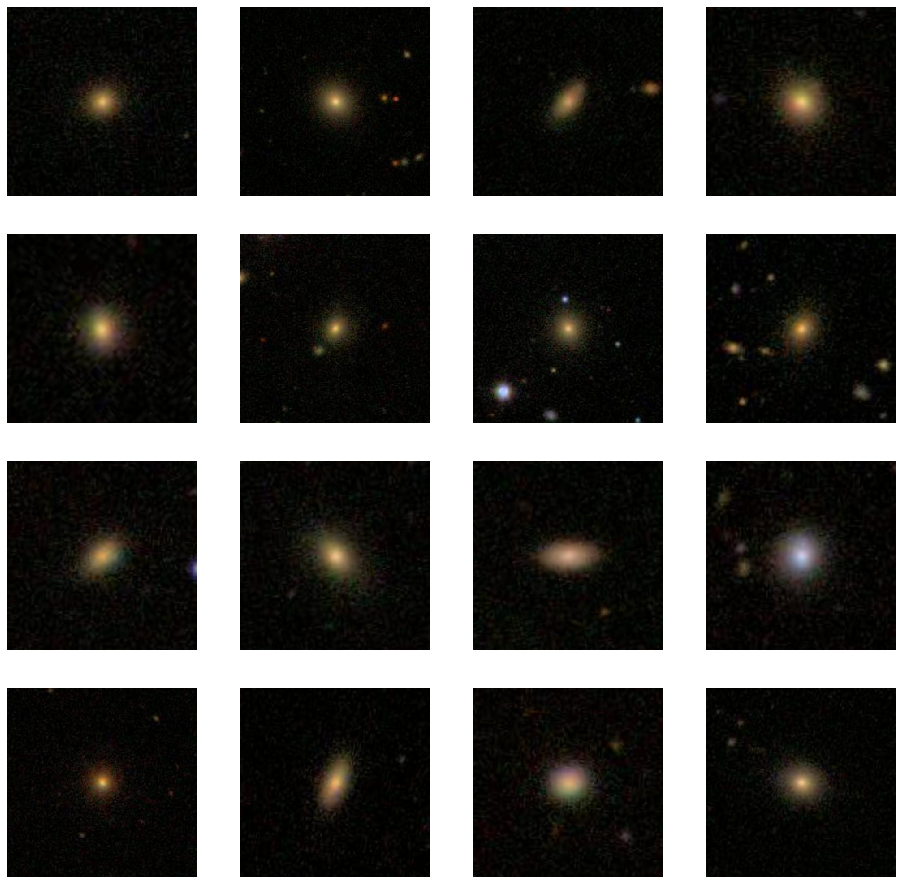

In [10]:
plot16(class1_imgs)

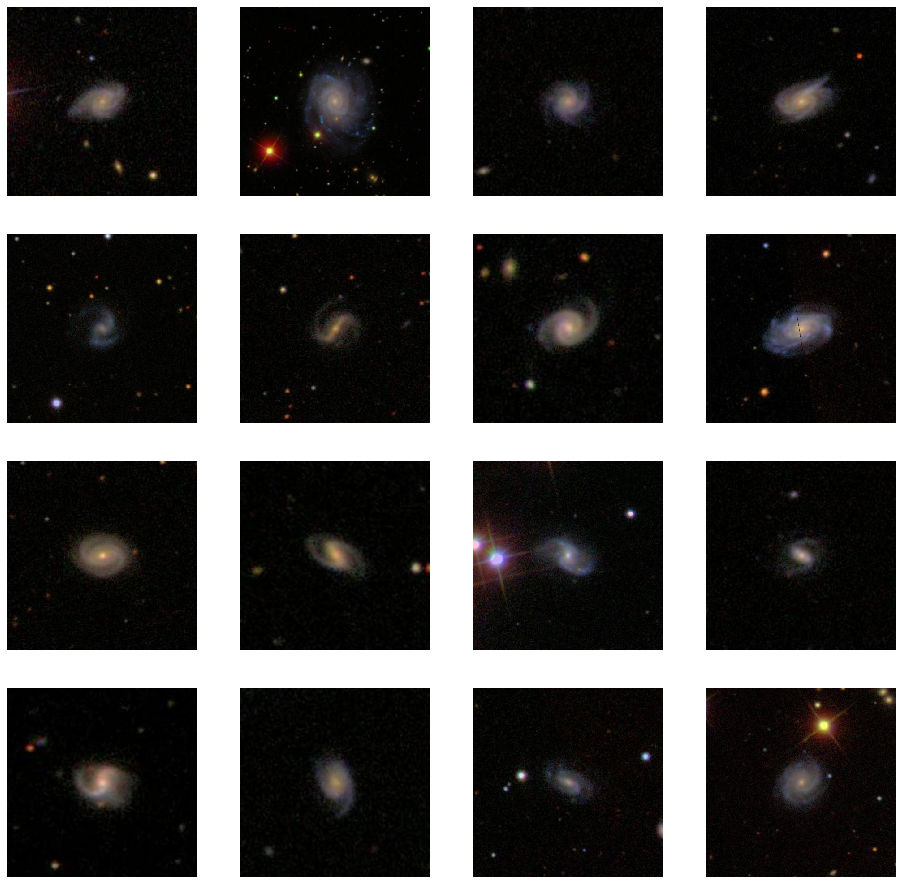

In [11]:
plot16(class2_imgs)

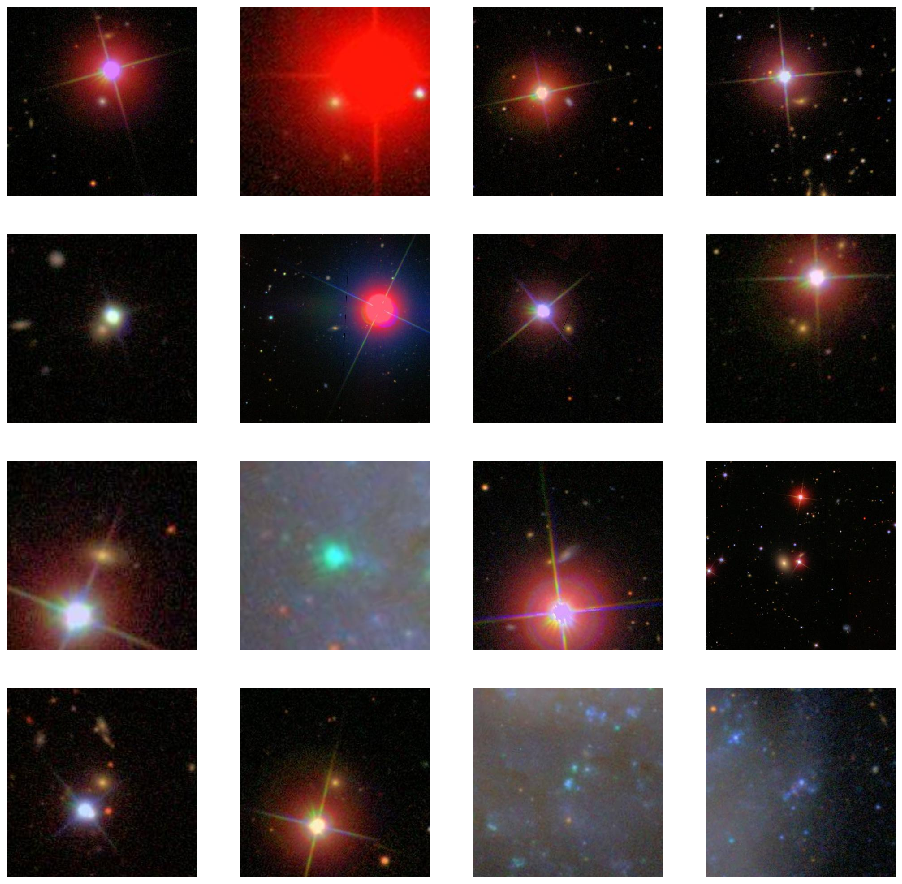

In [12]:
plot16(class3_imgs)

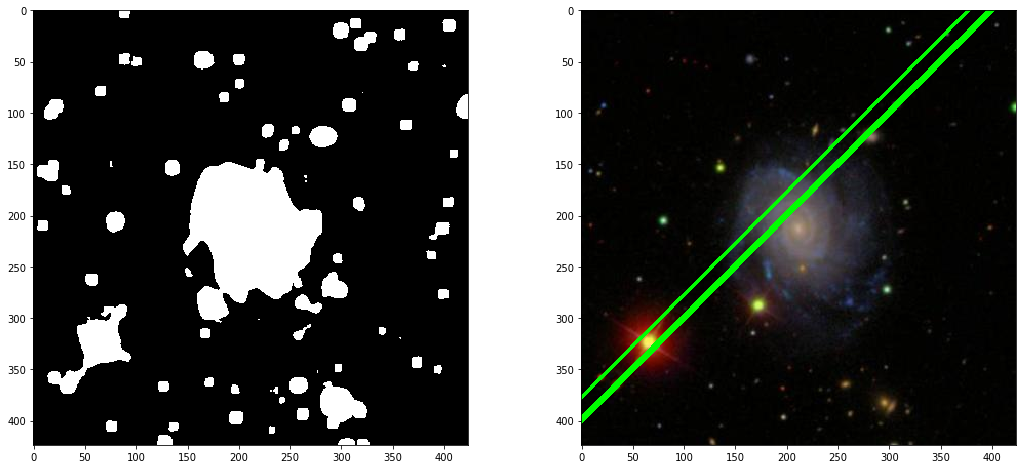

In [13]:
plt.figure(figsize=(18,8))
image = class2_imgs[1].copy()
#image = cv2.imread('./test.png')




nored = image.copy()
nored[:,:,2]=0

gray = cv2.cvtColor(nored, cv2.COLOR_BGR2GRAY)



grayblur1 = cv2.blur(gray.astype(float),(10,10))
grayblur2 = cv2.blur(gray.astype(float),(150,150))

gray = ((grayblur1-grayblur2)) # .astype(np.uint8)
gray = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX)

#gray = (np.log(gray+1))
#gray = cv2.Laplacian(gray,cv2.CV_64F) #.astype(np.uint8)

gray = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
ret,gray = cv2.threshold(gray,np.median(gray)*1.2,255,cv2.THRESH_BINARY)
#gray = cv2.blur(gray.astype(float),(20,20))


plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

lines = cv2.HoughLinesP(gray,1,np.pi/180,300,minLineLength=80)
#print(lines.shape)
try:
    for line in lines:
        x1=line[0][0]
        y1=line[0][1]
        x2=line[0][2]
        y2=line[0][3]

        cv2.line(image,(x1,y1),(x2,y2),(0,0,255),2)
except:
    pass

lines = cv2.HoughLines(gray,1,np.pi/180,300)
try:
    for line in lines:
        theta = line[0][1]
        rho = line[0][0]
    
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)
except:
    pass
        
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [14]:
def stardetect(image):
    
    nored = image.copy()
    nored[:,:,2]=0

    gray = cv2.cvtColor(nored, cv2.COLOR_BGR2GRAY)



    grayblur1 = cv2.blur(gray.astype(float),(10,10))
    grayblur2 = cv2.blur(gray.astype(float),(150,150))

    gray = ((grayblur1-grayblur2)) # .astype(np.uint8)
    gray = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX)

    #gray = (np.log(gray+1))
    #gray = cv2.Laplacian(gray,cv2.CV_64F) #.astype(np.uint8)

    gray = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    ret,gray = cv2.threshold(gray,np.median(gray)*1.2,255,cv2.THRESH_BINARY)
    #gray = cv2.blur(gray.astype(float),(20,20))


    lines = cv2.HoughLinesP(gray,1,np.pi/180,300,minLineLength=80)
    #print(lines.shape)
    try:
        for line in lines:
            x1=line[0][0]
            y1=line[0][1]
            x2=line[0][2]
            y2=line[0][3]

            cv2.line(nored,(x1,y1),(x2,y2),(0,0,255),2)
    except:
        pass

    lines = cv2.HoughLines(gray,1,np.pi/180,300)
    try:
        for line in lines:
            theta = line[0][1]
            rho = line[0][0]

            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            cv2.line(nored,(x1,y1),(x2,y2),(0,255,0),2)
    except:
        pass


    plt.imshow(cv2.cvtColor(nored, cv2.COLOR_BGR2RGB))

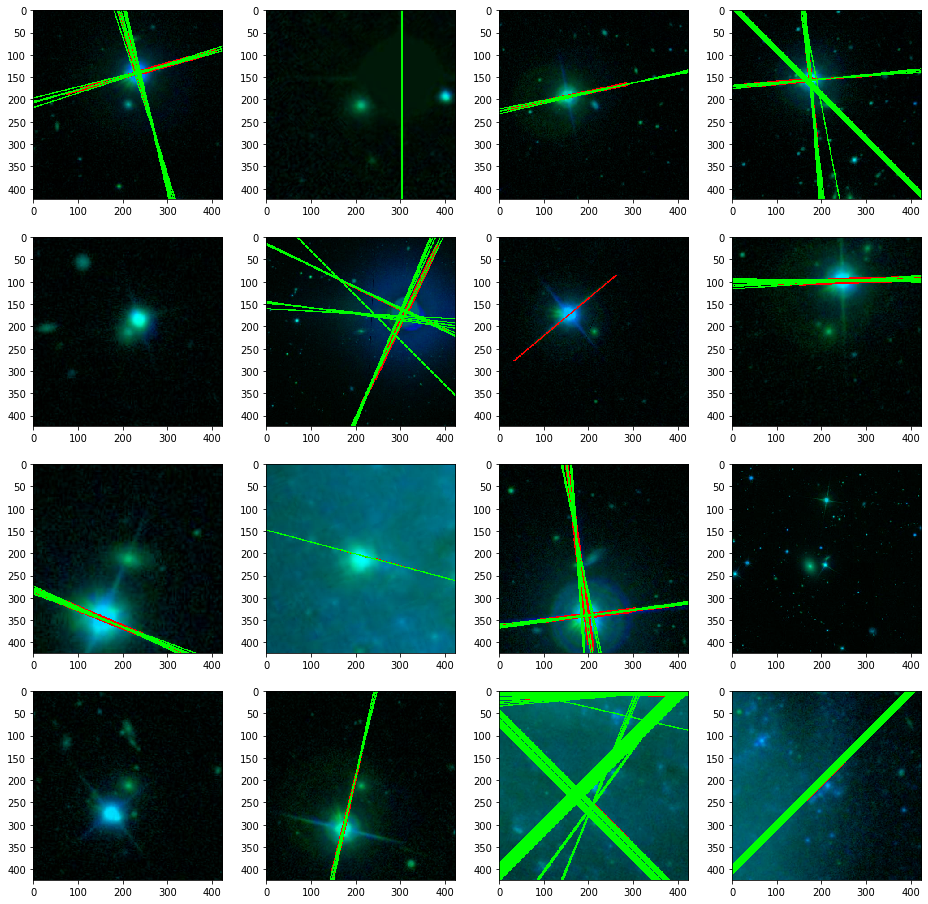

In [15]:
plt.figure(figsize=(16,16))
for i,img in enumerate(class3_imgs):
    plt.subplot(4,4,i+1)
    stardetect(img)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

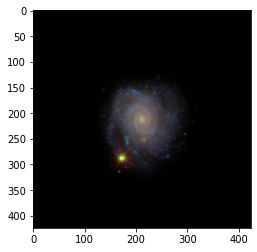

In [16]:


def isolate(image):
    image = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.blur(gray,(5,5))

    blur = cv2.blur(image,(30,30))

    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)

    # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    # sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=3)
    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)

    # Marker labelling
    ret, markers = cv2.connectedComponents(thresh)
    # Add one to all labels so that sure background is not 0, but 1
    #markers = markers+1
    # Now, mark the region of unknown with zero
    #markers[unknown==255] = 0

    markers = cv2.watershed(blur,markers)
    centergroup= markers[212,212]
    #image[markers != centergroup] = [0,0,0]
    #image[markers == -1] = [255,0,0]

    mask = np.array(markers).astype(np.uint8)
    mask[:,:]=0
    mask[markers == centergroup] = 255

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,30))
    mask = cv2.dilate(mask,kernel,iterations = 1)
    mask = cv2.blur(mask,(30,30)).astype(float)

    for i in range(3):
        image[:,:,i] = (image[:,:,i] * mask/255.0).astype(np.uint8)

    
    
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    return image
image = class2_imgs[1]    
isolate(image)

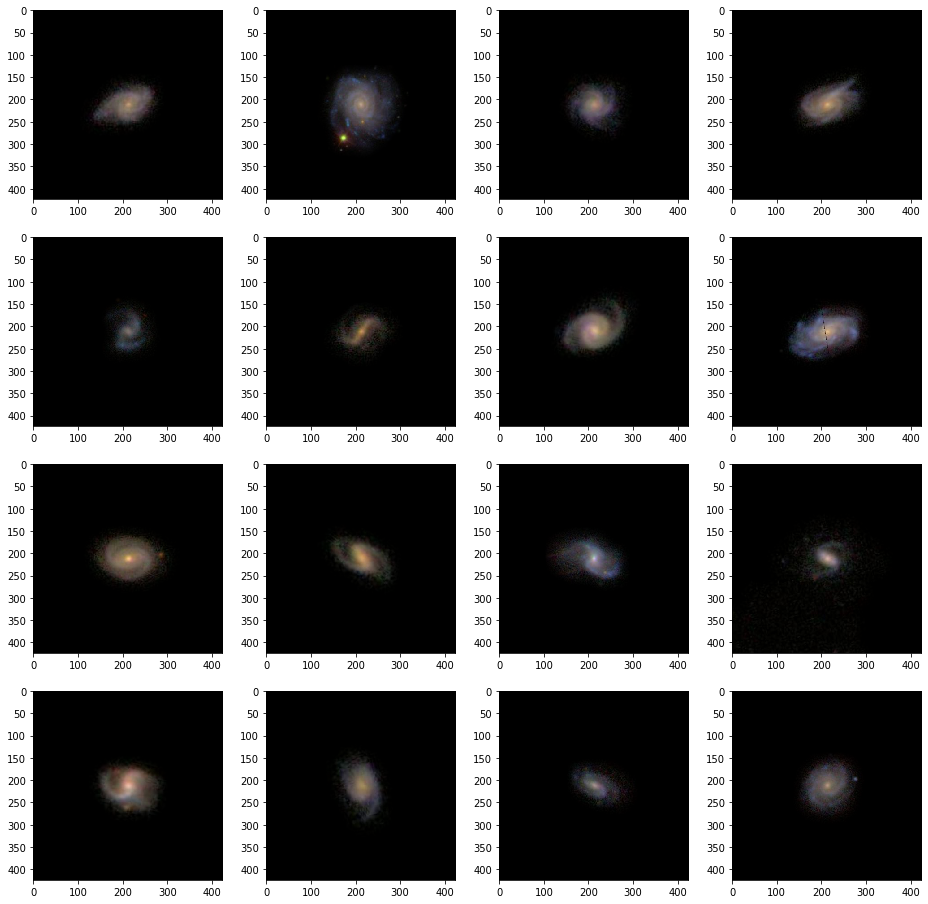

In [17]:
plt.figure(figsize=(16,16))
for i,img in enumerate(class2_imgs):
    plt.subplot(4,4,i+1)
    isolate(img)
plt.show()

In [18]:
def black_crop(image):
    mask = image[:,:,1].copy()
    mask[:,:]=255
    mask[image[:,:,1]==0]=0
    
    minx=413
    maxx=0
    maskx=mask.sum(axis=1)
    
    for i,val in enumerate(maskx):
        if val!=0 and i < minx:
            minx = i
        if val!=0 and i > maxx:
            maxx = i
    
    miny=413
    maxy=0
    masky=mask.sum(axis=0)
    for i,val in enumerate(masky):
        if val!=0 and i < miny:
            miny = i
        if val!=0 and i > maxy:
            maxy = i
    centerx = (minx+maxx)//2
    centery = (miny+maxy)//2
    image = image[centerx-128:centerx+128, centery-128:centery+128]
    #image = image[minx:maxx, miny:maxy]
    return image

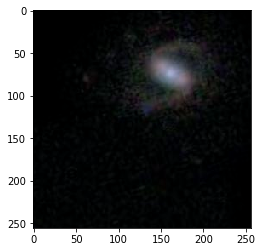

In [19]:
image = black_crop(isolate(class2_imgs[11]))
plt.imshow(image)

In [45]:
from tensorflow.keras.layers import Dense, Activation, Input, Conv2D, MaxPooling2D, Flatten, GlobalMaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
import tensorflow as tf


In [55]:
def get_model():
    return Sequential([
        Input(shape=(256,256,3)),
        Conv2D(512,(3,3),input_shape=(256,256,3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(256,(3,3)),
        GlobalMaxPooling2D(),
        
        Dense(3),
        Activation('sigmoid')
])

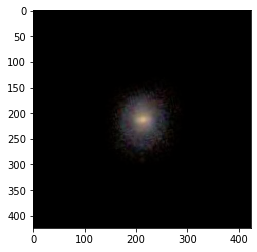

In [56]:
y_batch = y[0:100]
x_batch= []
dir = './images_training_rev1/'
for i in range(100):
    filename = dir + str(y.index[i]) + '.jpg'
    img =  cv2.imread(filename)
    x_batch.append(black_crop(isolate(img)))

y_batch = y_batch[['Class1.1','Class1.2','Class1.3']].to_numpy().astype(np.float16)
x_batch = np.asarray(x_batch).astype(np.float16)

In [57]:
y_batch.shape, x_batch.shape

((100, 3), (100, 256, 256, 3))

In [64]:
loss='categorical_crossentropy'
LEARNING_RATE = 0.01
BATCH_SIZE = 20 # computing the loss over the whole dataset
EPOCHS = 3
model = get_model()
model.compile(loss=loss, optimizer='adamax')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 254, 254, 512)     14336     
_________________________________________________________________
activation_13 (Activation)   (None, 254, 254, 512)     0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 127, 127, 512)     0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 125, 125, 256)     1179904   
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 771       
_________________________________________________________________
activation_14 (Activation)   (None, 3)                

In [59]:
with tf.device('/device:CPU:0'):
    history = model.fit(x_batch,y_batch, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)

Train on 100 samples
Epoch 1/3
100/100 [==============================] - 67s 668ms/sample - loss: 1.7155
Epoch 2/3
100/100 [==============================] - 69s 687ms/sample - loss: 1.0986
Epoch 3/3
100/100 [==============================] - 70s 702ms/sample - loss: 1.0986


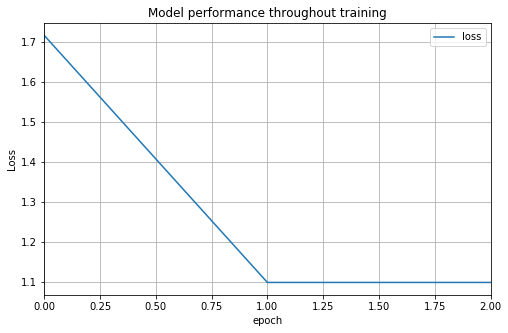

In [60]:
DataFrame(history.history).plot(figsize=(8, 5))#, logy=True)
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [61]:
x_batch.shape

(100, 256, 256, 3)

In [62]:
with tf.device('/device:CPU:0'):
    y_pred = model.predict(x_batch.astype(np.float16))

In [63]:
y_pred, y_batch

(array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1